In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,GlobalMaxPooling1D,MaxPooling1D,Embedding, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('spam.csv', encoding ='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns =['lables', 'data']

In [7]:
df.head()

,lables,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['b_lables'] = df['lables'].map({'ham':0, 'spam': 1})
Y =df['b_lables'].values

In [9]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], df['b_lables'], test_size =0.33)

In [13]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train) #.fit
sequences_train = tokenizer.texts_to_sequences(df_train)#similar to .transform
sequences_test = tokenizer.texts_to_sequences(df_test)

In [14]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens' % V)

Found 7247 unique tokens


In [15]:
data_train = pad_sequences(sequences_train)
print('Shape of data test tensor:', data_train.shape)

T = data_train.shape[1]

Shape of data test tensor: (3733, 162)


In [16]:
data_test = pad_sequences(sequences_test, maxlen =T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 162)


In [19]:
D = 20 # embedding dimensionality
M = 15 # hidden state dimensionality

# feature maps doubles 32, 64,128
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)  # output is T x D
x = Conv1D(32, 3, activation='relu')(x)  # output is T* x M
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)  # output is T2 x M2
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)  # output is T3 x M3
x = GlobalMaxPooling1D()(x)  # output is M3
x = Dense(1, activation='sigmoid')(x)  # output is 1

model = Model(i,x)

In [20]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy'],
)

r = model.fit(
    data_train, 
    Ytrain, 
    epochs =5, 
    validation_data = (data_test, Ytest)
)


Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8650 - loss: 0.4509 - val_accuracy: 0.9380 - val_loss: 0.1904
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9594 - loss: 0.1255 - val_accuracy: 0.9761 - val_loss: 0.0915
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9884 - loss: 0.0388 - val_accuracy: 0.9815 - val_loss: 0.0659
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9968 - loss: 0.0099 - val_accuracy: 0.9815 - val_loss: 0.0844
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9994 - loss: 0.0051 - val_accuracy: 0.9831 - val_loss: 0.0837


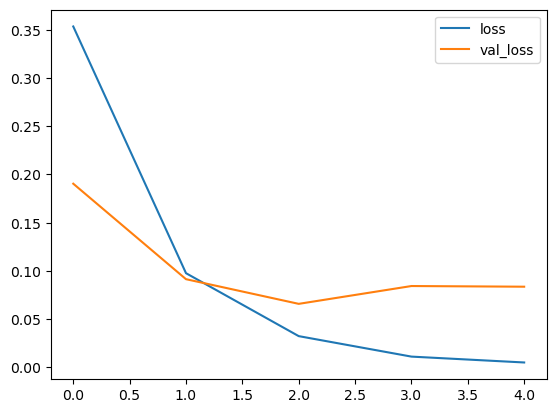

In [21]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

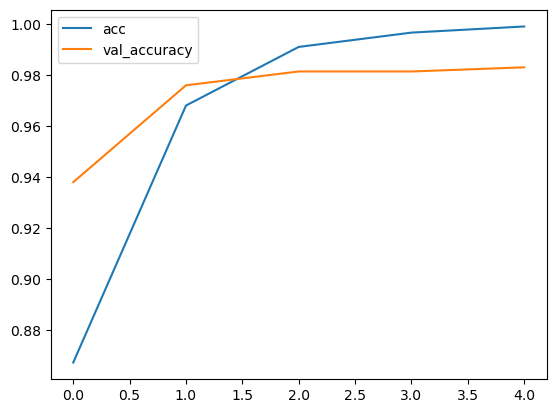

In [22]:
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()